# Example 14.5: Cooling with Dehumidification

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An air-conditioning system takes in atmospheric air at $90^\circ\mathrm{F}$, $1\ \mathrm{atm}$ with an $80\%$ relative humidity at a rate of $25\ \mathrm{CFM}$ and cools it to a temperature of $65\circ\mathrm{F}$.  The condensate leaves as saturated liquid water at $65^\circ\mathrm{F}$. Determine:
* (a) The relative humidity of the exiting air
* (b) The specific humidity of the exiting air
* (c) The mass flow rate of condensate leaving system
* (d) The required rate of heat transfer to the cools

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from thermoJFM.templates.humidair_USCS_F import *

### Given

In [2]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(90,'degF')
rel_hum[1] = Quantity(0.8,'')
Vdot[1] = Quantity(25,'cfm')

# State 2 - Exit
T[2] = Quantity(65,'degF')
rel_hum[2] = Quantity(1,'')

display.Summary(locals());

<IPython.core.display.Latex object>

,T,Vdot,rel_hum
unit,°F,ft³/s,
1,90,0.416667,0.8
2,65,-,1.0


In [3]:
states.fix(1,humidair)
states.fix(2,humidair)

display.Summary(locals());

<IPython.core.display.Latex object>

,T,v,h,s,Vdot,T_wb,T_dp,rel_hum,phi,omega
unit,°F,ft³/lb_dry_air,Btu/lb_dry_air,Btu/lb_dry_air/°R,ft³/s,°F,°F,,,lb_water/lb_dry_air
1,90,14.402379,41.131766,0.079707,0.416667,84.539683,82.99274,0.8,0.8,0.024717
2,65,13.503172,22.384740,0.044642,-,65.000000,65.00000,1.0,1.0,0.013272


#### (a) Relative humidity at exit

\begin{equation}
\phi_{\mathrm{exit}} = 100\%
\end{equation}

#### (b) Humidity ratio at exit

In [4]:
omega[2] = omega[2]

display.Calculations(locals());

<IPython.core.display.Latex object>

#### (c) Water flow rate

In [5]:
# Dry air mass flow rate
mdot_a[1] = Vdot[1]/v[1]

# Water flow rate
mdot_w['w'] = mdot_a[1]*(omega[1]-omega[2])
mdot_w_out = mdot_w['w'].to('lb_water/min')

display.Calculations(locals(),comments=True);

 Dry air mass flow rate

<IPython.core.display.Latex object>

 Water flow rate

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (d) Cooling load

In [6]:
# 1st Law
h_w['w'] = humidair.h_w(x=0,T=T[2])
Qdot_out = mdot_a[1]*(h[1]-h[2]) + mdot_w['w']*h_w['w']
Qdot_out = Qdot_out.to('Btu/min') # hide

display.Calculations(locals(),comments=True);

 1st Law

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Psychrometric Chart

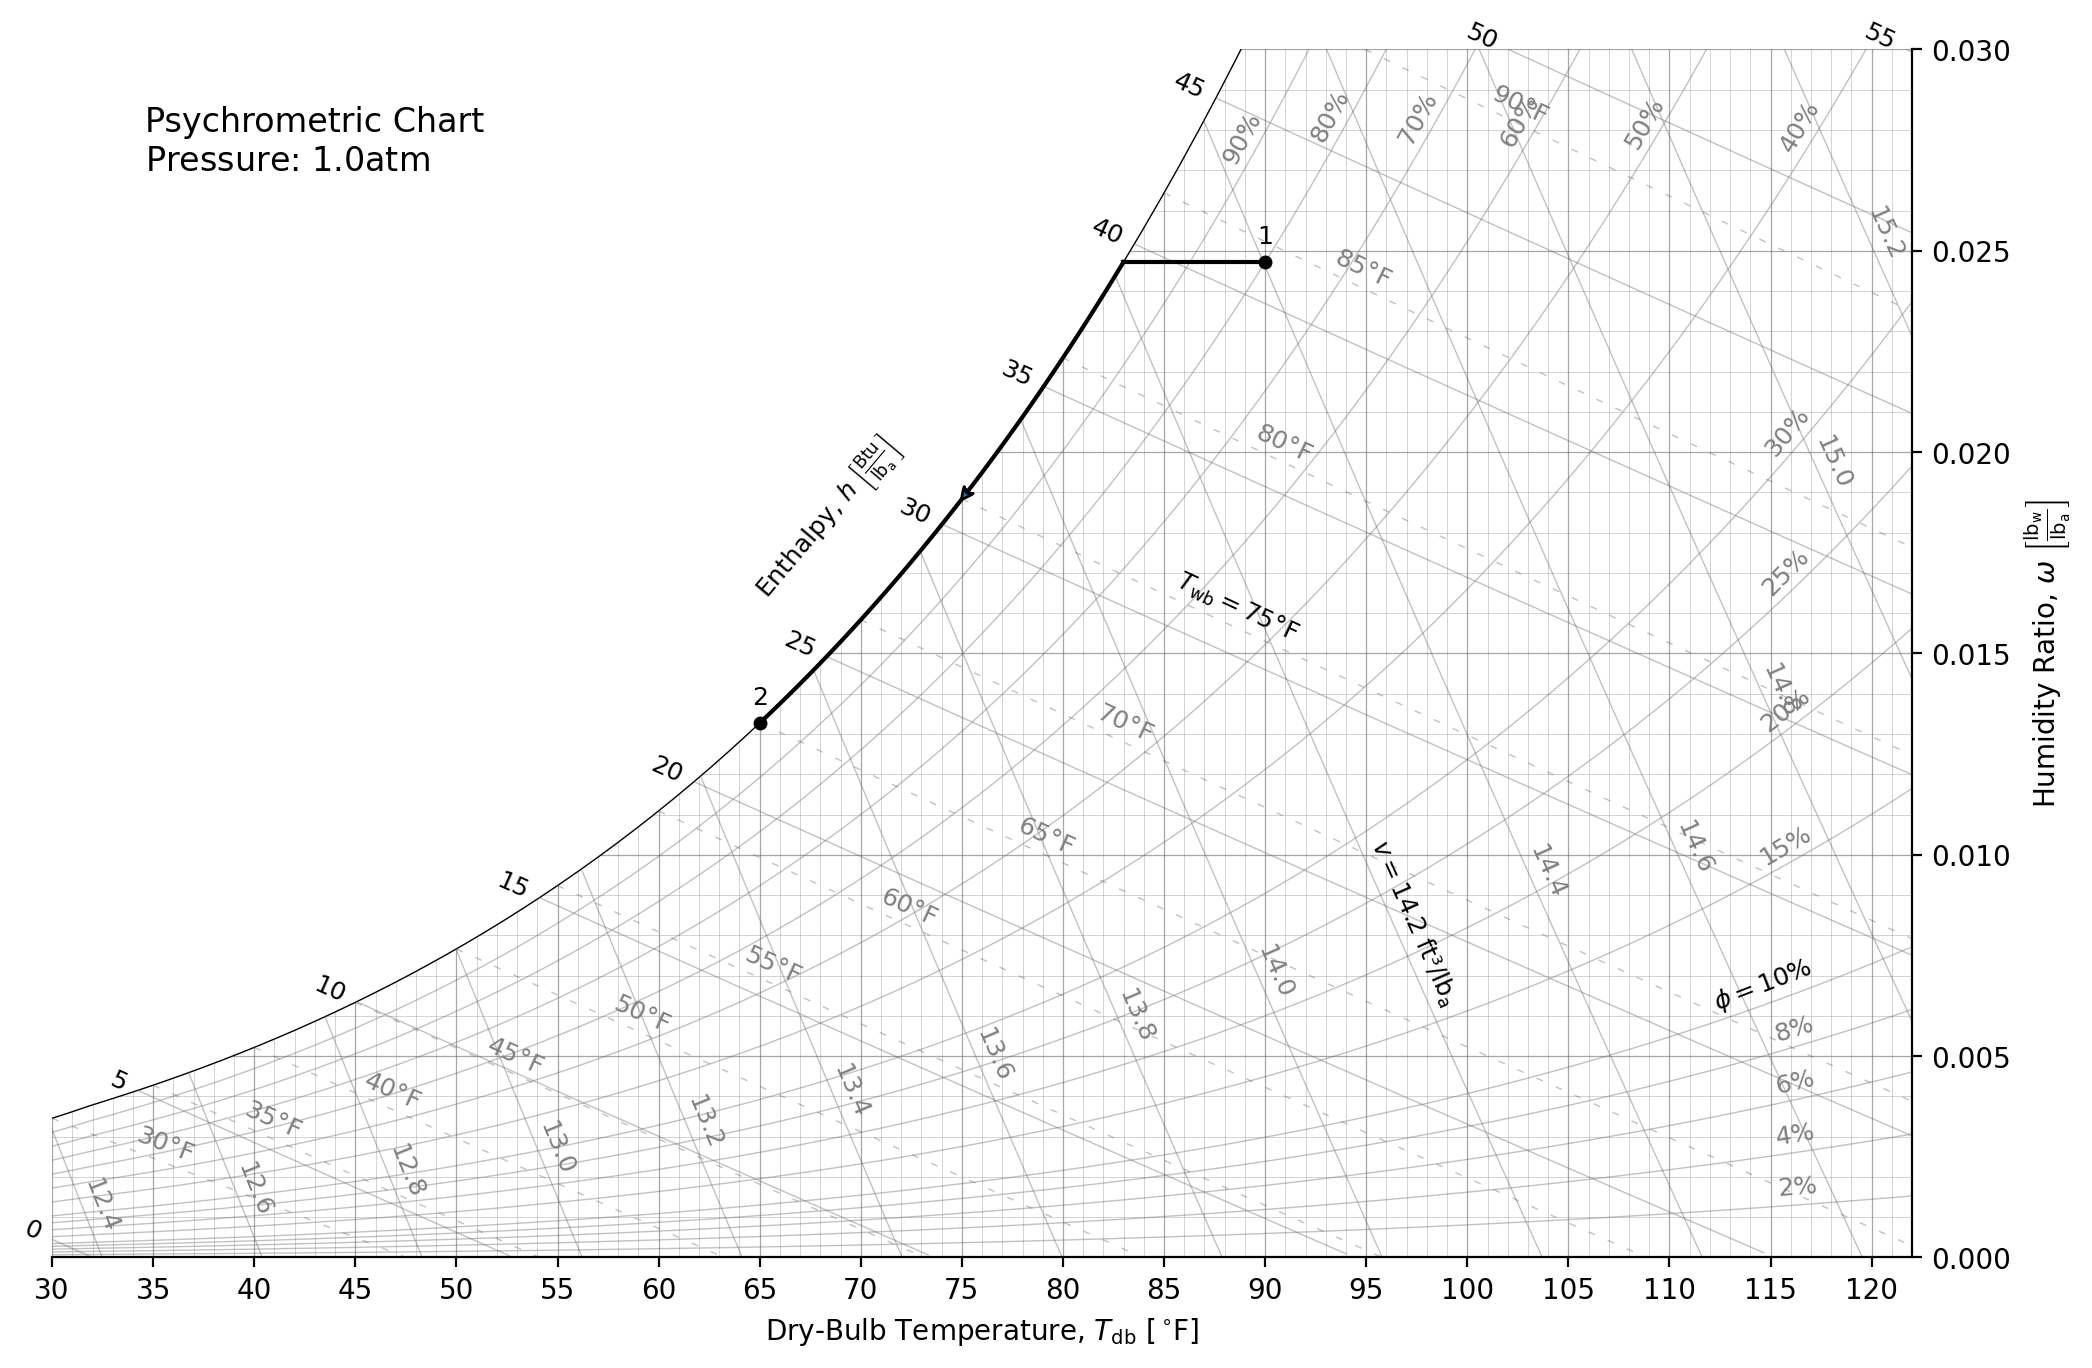

In [7]:
psych = humidair.psychrometric_chart(redraw=False)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2])

# Plot Processes
psych.plot_process(states[1],states[2],path='simple cooling');